## Basic Project of a Langgraph

In [10]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from IPython.display import display, Image

In [4]:
base_url = "http://localhost:11434"
model = 'llama3.2:1b'

llm = ChatOllama(
    base_url=base_url,
    model = model,
    temperature=0.8,
    num_predict = 256
)

In [6]:
llm.invoke('what my IPv4')

AIMessage(content="I'm not able to access or display your IP address at this time. However, I can tell you that an IP address is a unique numerical identifier assigned to each device connected to the internet. It's usually in the format of `xxx.xxx.xxx.xxx`, where `xxx` is a group of three digits.\n\nIf you need to know your IP address, you can try checking your device's network settings or looking for it on the device itself. Alternatively, you can use a simple online tool or app to find your public IP address and see what it looks like.", additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-05-04T05:52:24.5567569Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 8255711900, 'load_duration': 4682946500, 'prompt_eval_count': 29, 'prompt_eval_duration': 665752900, 'eval_count': 115, 'eval_duration': 2898850300}, id='run-45f0b961-8c4d-47db-8016-adcafbb533d8-0', usage_metadata={'input_tokens': 29, 'ou

In [11]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

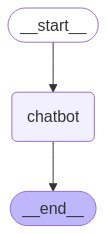

In [12]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
graph.invoke({"messages":["How many planets are then our solar system ?", "Explain why pluto is not included ?"]})

{'messages': [HumanMessage(content='How many planets are then our solar system ?', additional_kwargs={}, response_metadata={}, id='b43d1d18-0884-443d-a2c8-946bab7c27c6'),
  HumanMessage(content='Explain why pluto is not included ?', additional_kwargs={}, response_metadata={}, id='4f8029b2-f83d-4835-834b-555a6910267f'),
  AIMessage(content='There are eight planets in our solar system:\n\n1. Mercury\n2. Mars\n3. Venus\n4. Earth\n5. Neptune\n6. Uranus\n7. Saturn\n8. Jupiter\n\nPluto was previously considered the ninth planet, but in 2006, it was reclassified as a dwarf planet by the International Astronomical Union (IAU). This decision was made after the discovery of several other objects in the Kuiper Belt that were similar in size and composition to Pluto.\n\nThe main reasons for the reclassification of Pluto are:\n\n1. Size: Pluto is relatively small, with a diameter of approximately 2,374 kilometers. In comparison, Mercury, the smallest planet, has a diameter of approximately 4,879 ki

## Type Hinting, Data Validation

In [18]:
class Animal:
    def __init__(self, name):
        self.name = name.lower()

    def speak(self):
        if self.name == "dog":
            return "Dogs Barks"
        else:
            return "Cat Meaows"

In [19]:
ani = Animal("Dog")

In [20]:
ani.speak()

'Dogs Barks'

## Static Type Hinting

In [23]:
def greeting(name: str) -> str:
    return f"Hello, {name}"

greeting("Sandeepan")

'Hello, Sandeepan'

In [ ]:
def add(a:int, b:int) -> int:
    return a + b

add(1, 2)

In [27]:
def average(num: list[int]) -> float:
    return sum(num)/len(num)

average([1, 2, 3, 4, 5, 6, 7, 8, 9])

5.0

## Static Type Hinting using TypedDict 

In [31]:
from typing import TypedDict, Annotated, Optional, Literal
from pydantic import BaseModel, Field, EmailStr

In [34]:
class UserData(TypedDict):
    name: str
    age: int
    email: str

user_data = {"name":"Sandeepan", "age":30, "email":"example@gmail.com"}
data = UserData(user_data)
print("User data:", data)

User data: {'name': 'Sandeepan', 'age': 30, 'email': 'example@gmail.com'}


## Dynamic Type Hinting using Pydantic 
- Using Pydantic BaseModel for validation in runtime

In [35]:
class UserModel(BaseModel):
    name: str = Field(description="Name of the User")
    age: int = Field(description="Age of the user")
    gender: Optional[Literal["male", "female", "other"]] = "other"

In [36]:
data = UserModel(name="Sandeepan", age=20, gender="male")

In [37]:
print(data)

name='Sandeepan' age=20 gender='male'


## Chat with LangGraph - Baby Step Towards Agents

In [ ]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from IPython.display import display, Image

base_url = "http://localhost:11434"
model = 'llama3.2:1b'

llm = ChatOllama(
    base_url=base_url,
    model = model,
    temperature=0.8,
    num_predict = 256
)

class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

In [39]:
graph.invoke({"messages":["How many planets are then our solar system ?", "Explain why pluto is not included ?"]})

{'messages': [HumanMessage(content='How many planets are then our solar system ?', additional_kwargs={}, response_metadata={}, id='baf1470b-c7ac-4423-b5c1-15bb254504eb'),
  HumanMessage(content='Explain why pluto is not included ?', additional_kwargs={}, response_metadata={}, id='a9264bf7-5661-4e6e-8311-0720e6391132'),
  AIMessage(content='Our solar system consists of eight planets, which can be divided into two categories: the inner planets and the outer planets.\n\nThe eight planets in our solar system, in order from the Sun, are:\n\n1. Mercury\n2. Venus\n3. Earth\n4. Mars\n5. Jupiter\n6. Saturn\n7. Uranus\n8. Neptune\n\nPluto, on the other hand, was previously considered to be the ninth planet in our solar system. However, in 2006, the International Astronomical Union (IAU) redefined the term "planet" and reclassified Pluto as a dwarf planet.\n\nThe main reason for this reclassification is that Pluto does not meet the new criteria for a planet established by the IAU. The IAU defined